## Ruhlman Data Wordclouds 

Megan O, 4/22

(function definitions at the bottom)

In [134]:
import pandas as pd
import wordcloud
import numpy as np
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
import re
%matplotlib inline

Documentation: https://github.com/amueller/word_cloud 

In [40]:
some = pd.read_csv('some.csv') #2001-2004

In [15]:
test= some.Abstract[0]
test

'["This study examined the relationship between academic performance and satisfaction and congruence of major with tested career interests. Seventy-six Wellesley students completed questionnaires measuring the above constructs. Participants\' career interests were measured by John Holland\'s Self-Directed Search which classifies individuals according to typologies of vocational choice. He asserts that members of a vocation have similar personalities and respond to many situations and problems in similar fashion, creating what he labels a characteristic interpersonal environment. The major assumption of his theory is that vocational satisfaction, stability and achievement depend on the extent to which the individual\'s personality and work environment are congruent. There was a moderate positive correlation between congruence and satisfaction at Wellesley (r (54) = 0.38, p < 0.01). Participants with high congruence showed higher degree of satisfaction at Wellesley and in their majors th

In [42]:
def cleanAbstract(abs):
    abs.replace('[', '')
    abs.replace('"', '')
    abs = abs.strip()
    abs = abs[2:len(abs)-2]
    return abs

In [43]:
some['Abstract'] = some['Abstract'].apply(lambda x: cleanAbstract(x))

In [64]:
#wordcloud for all the data
allAbs = " ".join(some.Abstract)
allAbs = allAbs.replace("xc2", '')
allAbs = allAbs.replace("\\\\", '')
allAbs = allAbs.replace("\\", '')
allAbs = allAbs.lower()
allAbs = allAbs.replace("research", ' ')

In [154]:
color = np.array(Image.open("pink.jpg"))

In [168]:
wc = WordCloud(background_color="white", width=1200, height=800, font_path="light.ttc", max_font_size=50, stopwords=STOPWORDS.copy(), relative_scaling=0.5).generate(allAbs)
image_colors = ImageColorGenerator(color)

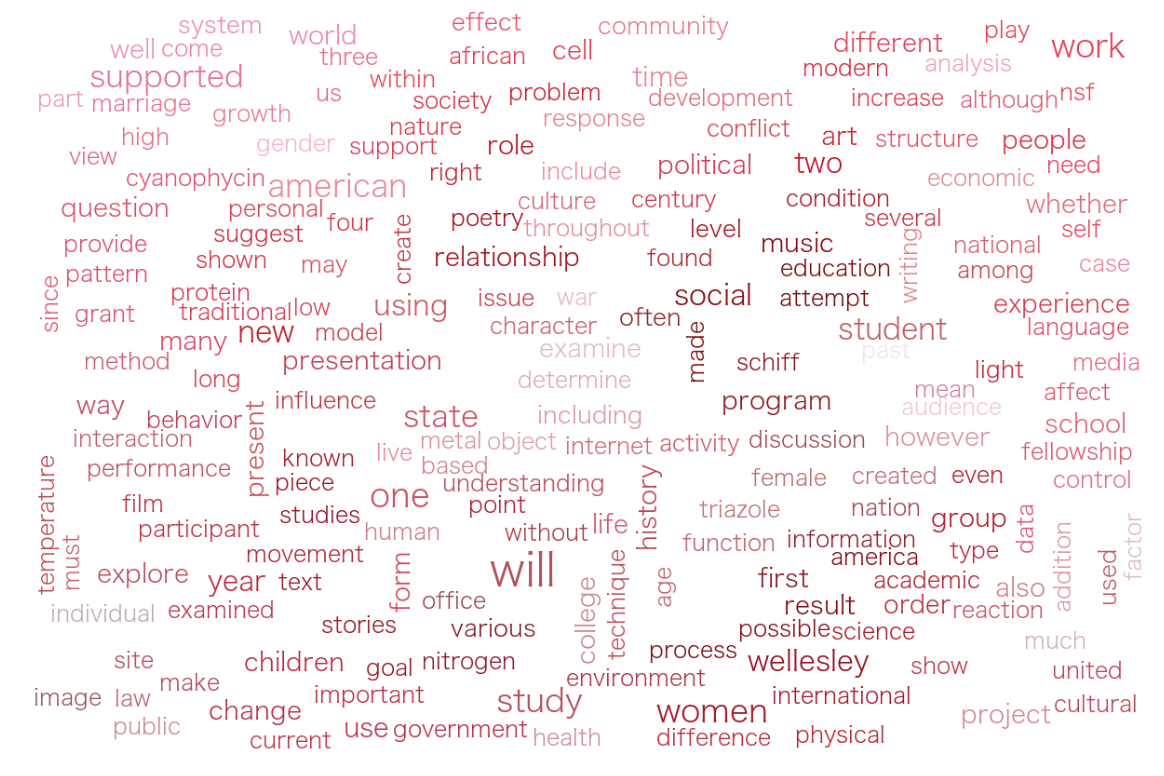

In [178]:
plt.figure(num=None, figsize=(20, 15), facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(wc.recolor(color_func=image_colors))
plt.show()
plt.savefig('some.png')

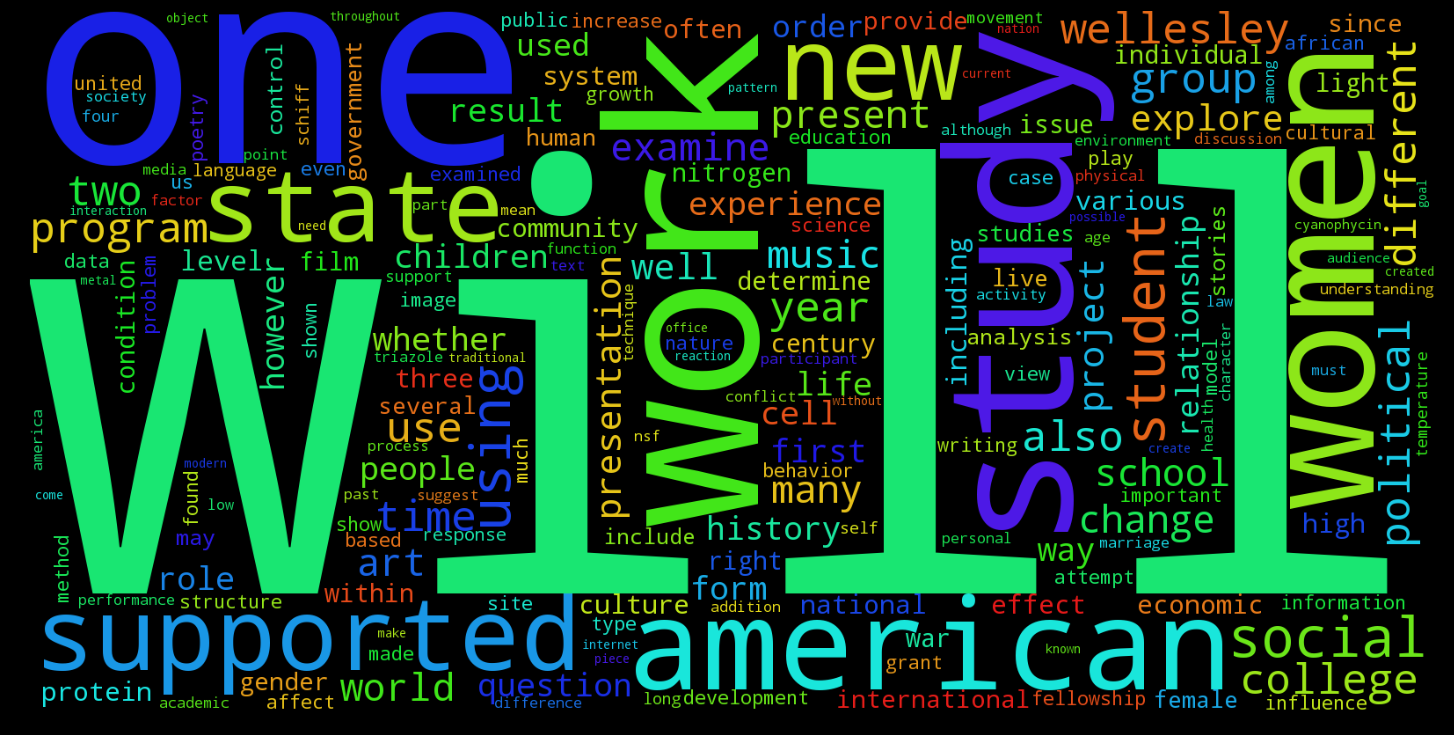

In [188]:
# Read the whole text.
text = allAbs
text.replace("will", '')
wordcloud = WordCloud(width=1600, height=800, stopwords=STOPWORDS.copy()).generate(text)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#Generates a wordcloud from a dataframe containing an Abstract field

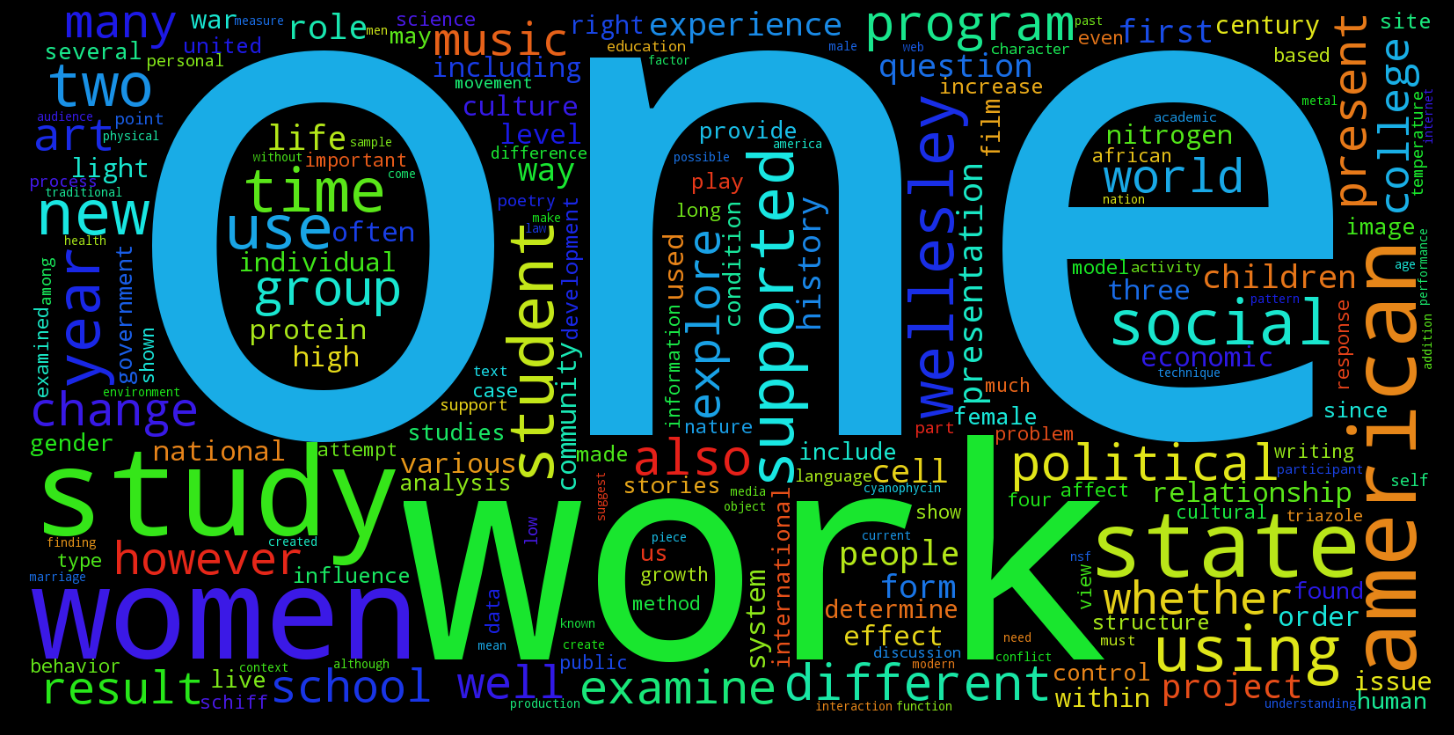

In [189]:
def cleanAbstract(abs):
    abs.replace('[', '')
    abs.replace('"', '')
    abs = abs.strip()
    abs = abs[2:len(abs)-2]
    return abs

def prepCloud(df):
    df['Abstract'] = some['Abstract'].apply(lambda x: cleanAbstract(x))
    #wordcloud for all the data
    allAbs = " ".join(some.Abstract)
    allAbs = allAbs.replace("xc2", '')
    allAbs = allAbs.replace("\\\\", '')
    allAbs = allAbs.replace("\\", '')
    allAbs = allAbs.lower()
    allAbs = allAbs.replace("research", ' ')
    return allAbs #this is all the text that will generate the wordcloud 

def generateCloud(text):
    text = text.replace("will", '')
    wordcloud = WordCloud(width=1600, height=800, stopwords=STOPWORDS.copy()).generate(text)
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

text = prepCloud(some)
generateCloud(text)